In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import numpy as np

def fft(data, nn, isign):
    # Padding the data array to the next power of two, if necessary
    n = len(data)
    if n < nn * 2:
        data.extend([0.0] * (nn * 2 - n))

    n = nn << 1
    j = 0
    for i in range(0, n, 2):
        if j > i:
            data[j], data[i] = data[i], data[j]  # SWAP
            data[j+1], data[i+1] = data[i+1], data[j+1]  # SWAP
        m = n >> 1
        while m >= 2 and j >= m:
            j -= m
            m >>= 1
        j += m

    mmax = 2
    while n > mmax:
        istep = mmax << 1
        theta = -isign * (2 * np.pi / mmax)
        wtemp = np.sin(0.5 * theta)
        wpr = -2.0 * wtemp * wtemp
        wpi = np.sin(theta)
        wr = 1.0
        wi = 0.0
        for m in range(0, mmax, 2):
            for i in range(m, n, istep):
                j = i + mmax
                if j < n:  # Ensure j does not exceed bounds
                    tempr = wr * data[j] - wi * data[j+1]
                    tempi = wr * data[j+1] + wi * data[j]
                    data[j] = data[i] - tempr
                    data[j+1] = data[i+1] - tempi
                    data[i] += tempr
                    data[i+1] += tempi
            wr_temp = wr * wpr - wi * wpi + wr
            wi = wi * wpr + wr * wpi + wi
            wr = wr_temp
        mmax = istep

    # Apply normalization if it's an inverse FFT (isign == -1)
    if isign == 1:
        factor = 1.0 / nn
        for i in range(n):
            data[i] *= factor



real part: 
[3.25, -0.5, -0.25, -0.49999999999999994]
imag. part: 
[0.0, 0.25, 0.0, -0.25]
magn
[3.25       0.55901699 0.25       0.55901699]


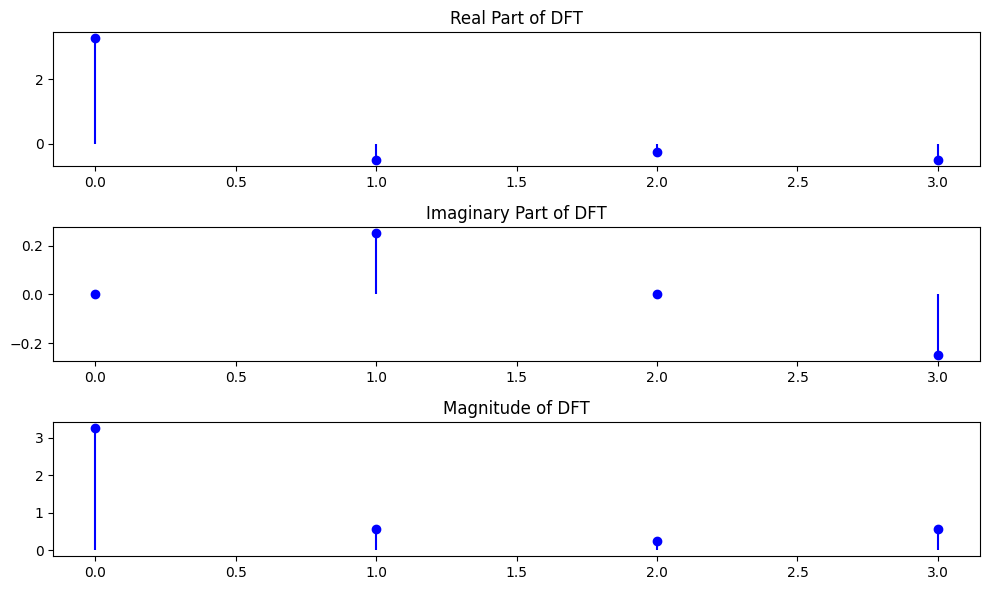

Original Signal:  [2, 3, 4, 4]
Reconstructed Signal from Inverse DFT:  [2.0, 3.0, 4.0, 4.0]


In [33]:
import numpy as np
import matplotlib.pyplot as plt



# Signal
f = [2, 3, 4, 4]
nn = 2 ** np.ceil(np.log2(len(f)))  # Adjust nn to the next power of two
data = [value for pair in zip(f, [0.0]*len(f)) for value in pair]  # Interleaving real and imaginary parts

# Forward FFT
fft(data, int(nn), 1)

# Extracting real, imaginary, and magnitude parts
real_part = data[0::2]
imag_part = data[1::2]
magnitudes = np.sqrt(np.square(real_part) + np.square(imag_part))

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].stem(real_part, linefmt='b-', basefmt=" ")
print("real part: ")
print(real_part)

axs[0].set_title('Real Part of DFT')

axs[1].stem(imag_part, linefmt='b-', basefmt=" ")
print("imag. part: ")
print(imag_part)
axs[1].set_title('Imaginary Part of DFT')

axs[2].stem(magnitudes, linefmt='b-', basefmt=" ")
print("magn")
print(magnitudes)
axs[2].set_title('Magnitude of DFT')

plt.tight_layout()
plt.show()

# Inverse FFT
fft(data, int(nn), -1)
reconstructed_signal = data[0::2]

# Verify if the inverse DFT works correctly
print("Original Signal: ", f)
print("Reconstructed Signal from Inverse DFT: ", reconstructed_signal)
